### National Cotton Fabric Association: Prediction of Quantity Demanded

The case study describes the problem of decline in production and sales of domestic cotton fabric. The board members presented the following reasons:

1. large increases in the volume of imported fabric on the market.
2. use of other fabrics by clothing manufacturers.
3. popularity of fabrics that require little or no ironing and involve easier care.

The following questions are required to be answered by analysing the data:

1. What has been the pattern of prices, production quantity, imported fabric quantity, and exported fabric quantity over the recent past?
2. What is the effect of price on the quantity of fabric produced?
3. Given the relationship of quantity versus price, what additional changes in production quantity are related to imports and to exports? 
4. Given the NCFA's interest in maximizing total revenue, and working from recent experience, what price should be used?

###### Importing the packages

In [2]:
library(forecast)
library(fpp)
library(TTR)

Loading required package: fma
Loading required package: expsmooth
Loading required package: lmtest
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: tseries


##### Importing the dataset

In [3]:
cotton <- read.csv("COTTON.csv")

###### Summaries
Let us take a look at the dataset

In [4]:
head(cotton)

QUARTER,YEAR,COTTONQ,WHOPRICE,IMPFAB,EXPFAB,TIME
1,66,2274,98.0,9.3,256.0,1
2,66,2287,98.1,3.7,189.0,2
3,66,2083,98.4,16.0,277.0,3
4,66,2181,98.7,4.7,477.0,4
1,67,2221,99.3,5.7,439.0,5
2,67,2131,99.5,8.3,334.3,6


In [5]:
summary(cotton)

    QUARTER          YEAR       COTTONQ        WHOPRICE         IMPFAB      
 Min.   :1.00   Min.   :66   Min.   :1277   Min.   : 98.0   Min.   : 1.300  
 1st Qu.:1.75   1st Qu.:67   1st Qu.:1552   1st Qu.:100.8   1st Qu.: 2.925  
 Median :2.50   Median :69   Median :1762   Median :107.4   Median : 4.850  
 Mean   :2.50   Mean   :69   Mean   :1780   Mean   :106.8   Mean   : 7.525  
 3rd Qu.:3.25   3rd Qu.:71   3rd Qu.:2035   3rd Qu.:112.2   3rd Qu.: 8.550  
 Max.   :4.00   Max.   :72   Max.   :2287   Max.   :115.8   Max.   :27.000  
     EXPFAB           TIME      
 Min.   : 80.0   Min.   : 1.00  
 1st Qu.:193.5   1st Qu.: 7.75  
 Median :277.1   Median :14.50  
 Mean   :274.0   Mean   :14.50  
 3rd Qu.:356.2   3rd Qu.:21.25  
 Max.   :477.0   Max.   :28.00  

The dataset contains the following:
1. **No. of observations:** 28
2. **Year:** Year for the observation (Range: 1966-1972)
3. **Quater:** Quarter for the observation (Range: 1-4)
4. **Cotprod:** Total Cotton production (in million lb) (Range: 1277-2287)
5. **Whoprice:** Wholesale price for cotton($ per lb) (Range: 98-115.8) 
6. **Import:** Quantity of cotton fabric imported (in million lb) (Range: 1.3-27)
7. **Export:** Quantity of cotton fabric exported (in million lb) (Range: 80-477)
8. **Time:** UID for observations (Range: 1-28)    

In [6]:
## column names
names(cotton)

[1] "QUARTER"  "YEAR"     "COTTONQ"  "WHOPRICE" "IMPFAB"   "EXPFAB"   "TIME"

##### Time series variables

Now let's separate the columns into individual variables and create time-series objects

In [7]:
cotq<-cotton$COTTONQ
prc<-cotton$WHOPRICE
impr<-cotton$IMPFAB
expr<-cotton$EXPFAB

Converting into time-series objects of 4 cycles:

In [8]:
prcts<-ts(prc, start=c(1966, 1), end=c(1972, 4), frequency=4)
cotqts <- ts(cotq, start=c(1966, 1), end=c(1972, 4), frequency=4)
imprts<-ts(impr, start=c(1966, 1), end=c(1972, 4), frequency=4)
exprts<-ts(expr, start=c(1966, 1), end=c(1972, 4), frequency=4)

We now plot the variables and check if any trend or seasonality is present in the data

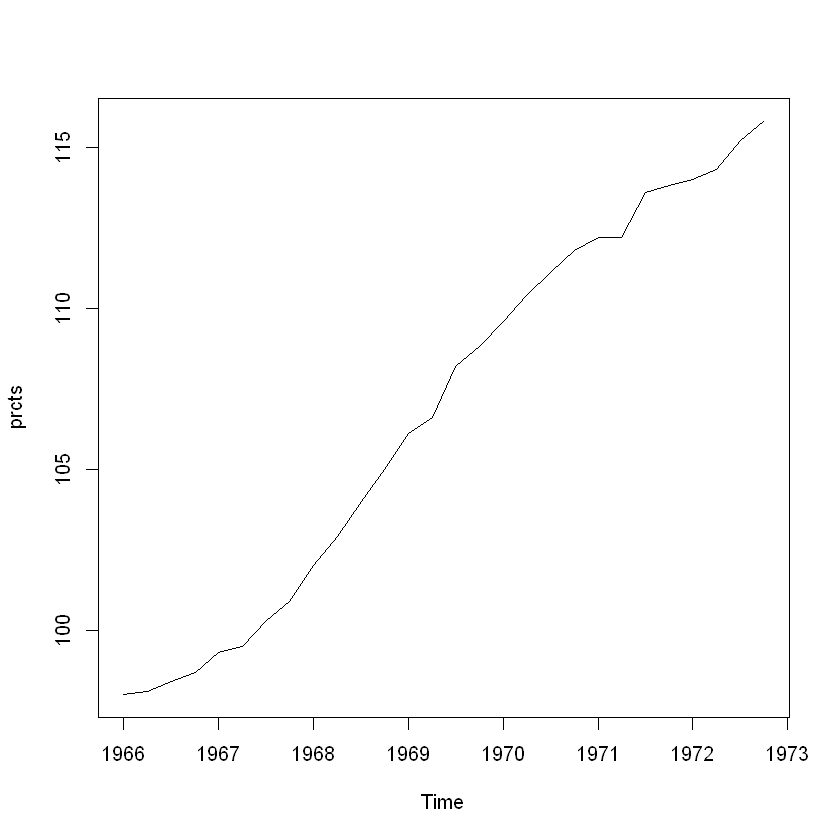

In [9]:
## Plotting the price
plot(prcts)

We do not observe any trend or seasonality in the Price variable. We can see occasioanl piece-wise linear trends between 1968-1969 and 1970-1971.

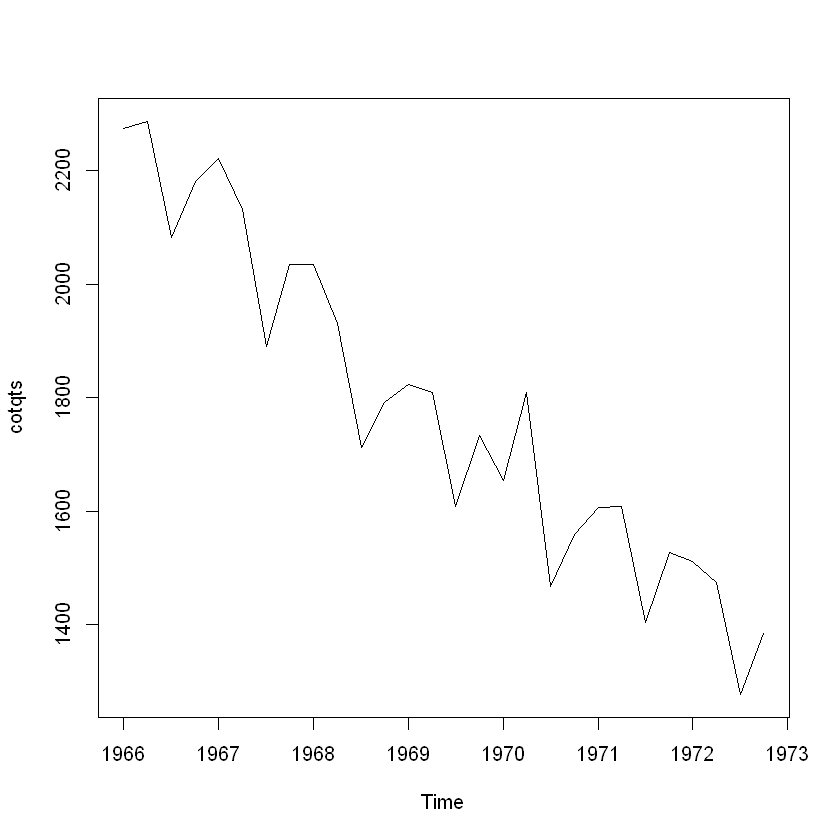

In [10]:
## Plotting Cotton quantity
plot(cotqts)

No clear trend or seasonality can be observed for the quantity of cotton.

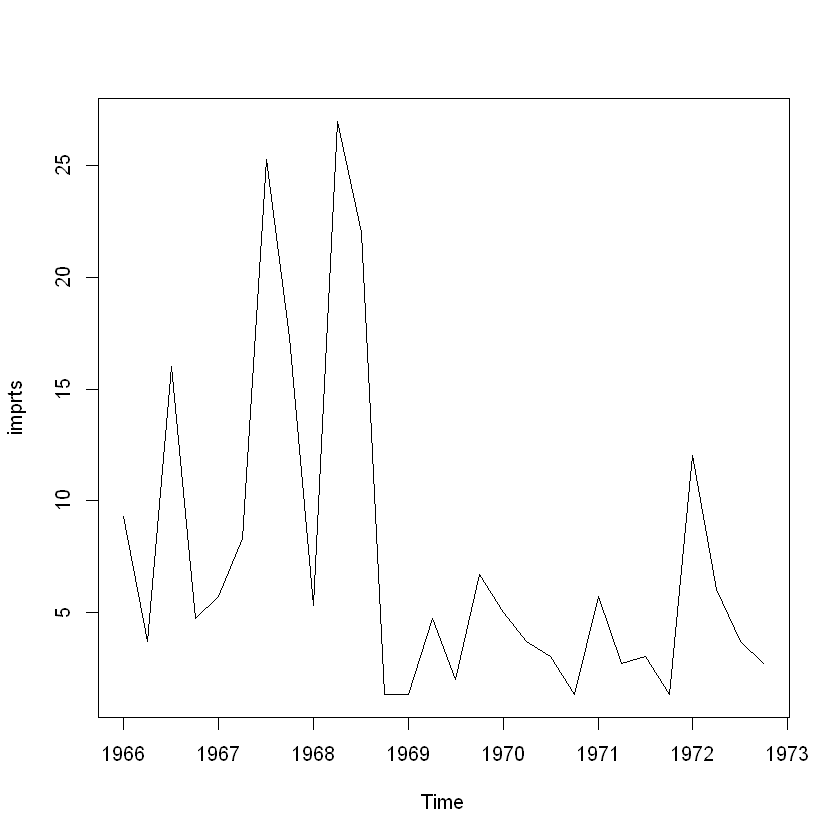

In [11]:
## Plotting the imports
plot(imprts)

No trend or seasonality can be observed for imports

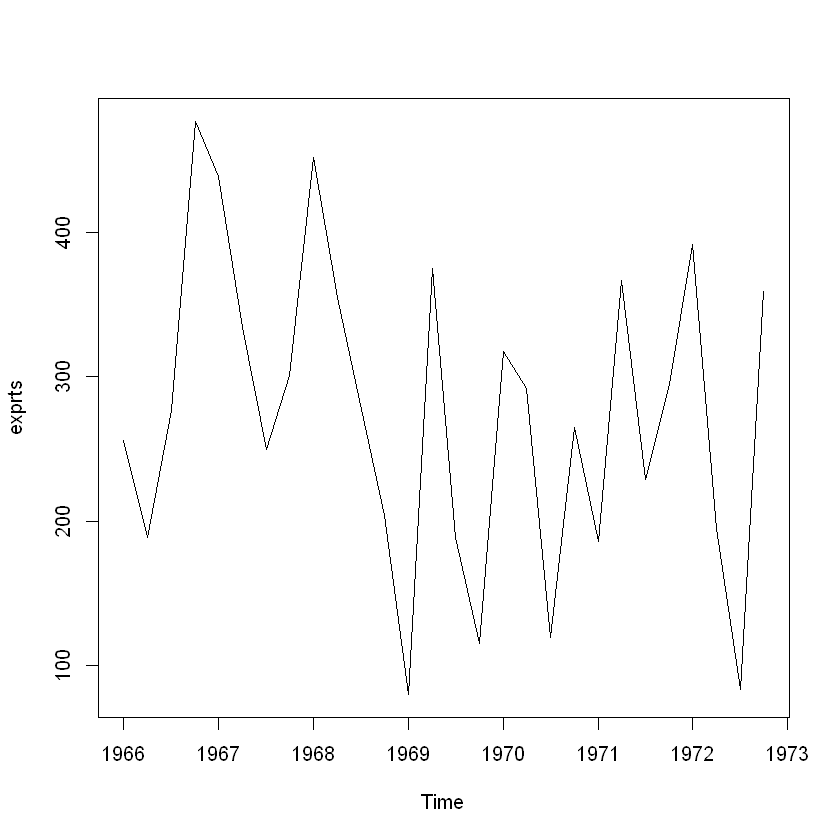

In [12]:
## Plotting for exports
plot(exprts)

No trend or seasonality can be observed for exports

##### Scatterplot: Cotton Production Quantity vs Wholesale price

Let us create a scatterplot between quantity of cotton produced to its wholesale price to understand it's relationship

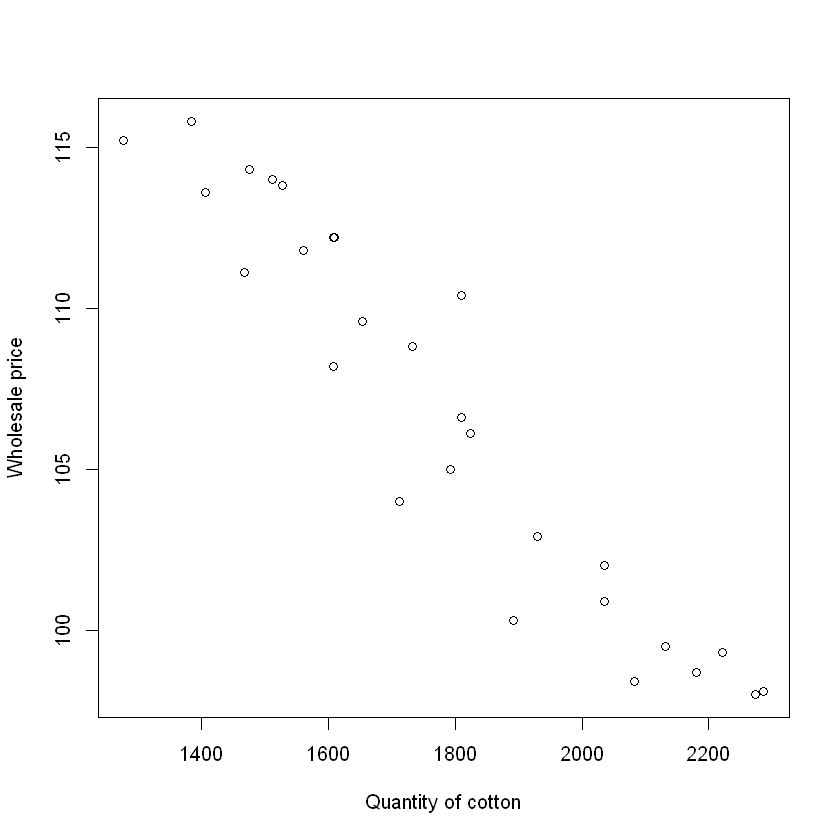

In [13]:
plot(prc~cotq, data=cotton, xlab="Quantity of cotton", ylab="Wholesale price")

We observe that the wholesale price of cotton and quantity of cotton produced are negatively related and there is a clear downtrend. As the quantity of cotton produced increases, the wholesale price decreases and vice-versa.

###### Simple least squares regression

In order to understand the relationship between quantity and price we use a simple least squares regression.

In [14]:
reg <- lm(prc~cotq, data=cotton)
reg


Call:
lm(formula = prc ~ cotq, data = cotton)

Coefficients:
(Intercept)         cotq  
  142.39806     -0.01999  


From the regression, we have the following relationship:

P(Wholesale) = -0.01999*Q(Cotton) + 142.3981

Now we shall check the regression line

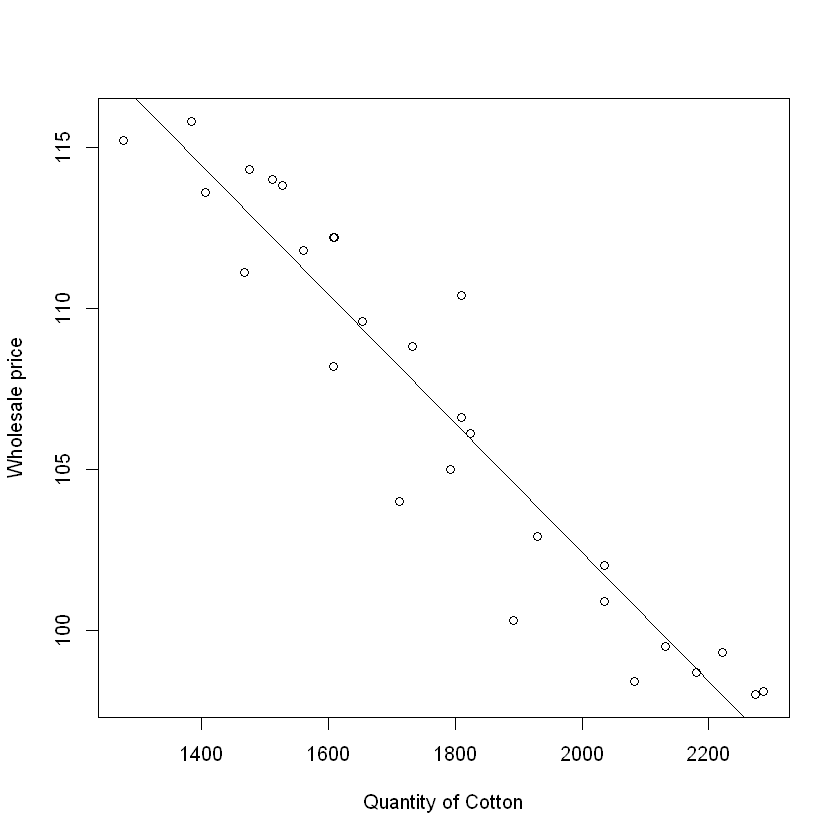

In [15]:
plot(cotq,prc, xlab="Quantity of Cotton", ylab="Wholesale price")
abline(coefficients(reg))

In [16]:
summary(reg)


Call:
lm(formula = prc ~ cotq, data = cotton)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2900 -1.0750  0.2803  1.3291  4.1905 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 142.398062   2.326525   61.21  < 2e-16 ***
cotq         -0.019994   0.001291  -15.49 1.21e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.948 on 26 degrees of freedom
Multiple R-squared:  0.9022,	Adjusted R-squared:  0.8985 
F-statistic: 239.9 on 1 and 26 DF,  p-value: 1.212e-14


We have a good R-squared score of 90.22% which denotes a good fit. Now we shall plot the residuals versus the predicted cotton production.

In [17]:
## Obtaining the predicted values
cotton$predicted <- predict(reg)
## Obtaining the residual values
cotton$residuals <- residuals(reg) 
head(cotton)

QUARTER,YEAR,COTTONQ,WHOPRICE,IMPFAB,EXPFAB,TIME,predicted,residuals
1,66,2274,98.0,9.3,256.0,1,96.93240,1.0675973
2,66,2287,98.1,3.7,189.0,2,96.67248,1.4275153
3,66,2083,98.4,16.0,277.0,3,100.75120,-2.3511982
4,66,2181,98.7,4.7,477.0,4,98.79182,-0.0918162
1,67,2221,99.3,5.7,439.0,5,97.99207,1.3079315
2,67,2131,99.5,8.3,334.3,6,99.79150,-0.2915009


Loading required package: ggplot2


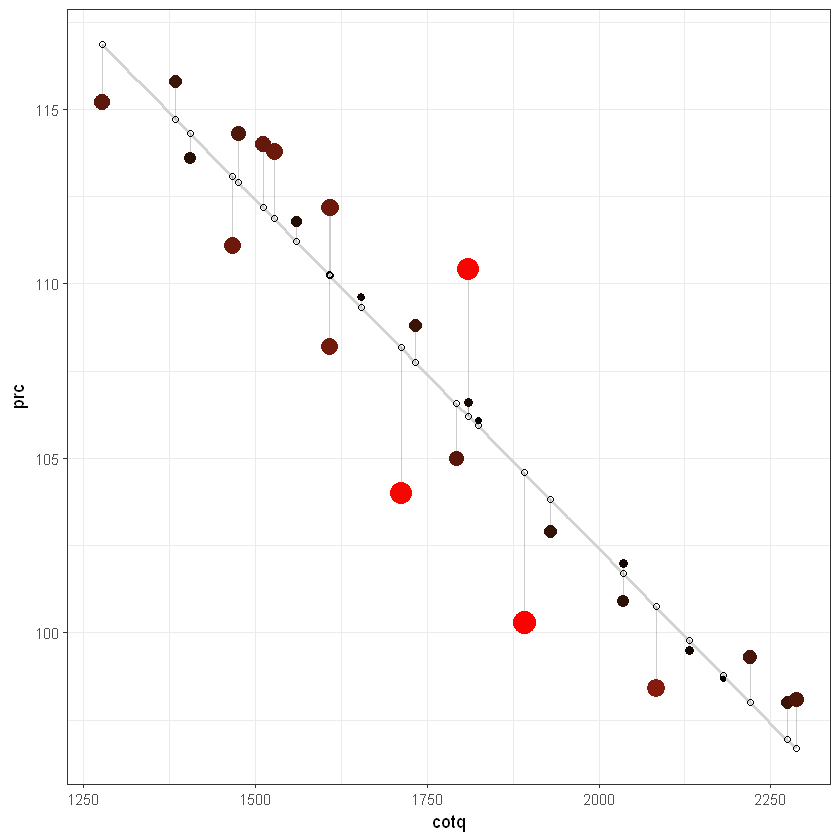

In [18]:
## Plotting the actual, predicted and residuals
require(ggplot2)
p1 <- ggplot(cotton, aes(x= cotq, y = prc))
p1 <- p1 + geom_point() + geom_smooth(method="lm", se= FALSE, color = "lightgrey")

# Adding the predicted values
p1 <- p1 + geom_point(aes(y=predicted), shape=1)

# Connecting the datapoints with their predicted values
p1 <- p1 + geom_segment(aes(xend = cotq, yend= predicted), alpha = 0.2)
p1 <- p1 + theme_bw()

# Adding color and size depending on residuals
p1 <- p1 + geom_point(aes(color = abs(residuals), size = abs(residuals))) + scale_color_continuous(low="black", high = "red")
p1 <- p1 + guides(color = FALSE, size = FALSE)
p1

##### Total Revenue

We compute total revenue using quantity and wholesale price

In [19]:
for(i in 1:nrow(cotton)){
    cotton$REVENUE[i] <- cotton$COTTONQ[i] * cotton$WHOPRICE[i]
}
head(cotton)

QUARTER,YEAR,COTTONQ,WHOPRICE,IMPFAB,EXPFAB,TIME,predicted,residuals,REVENUE
1,66,2274,98.0,9.3,256.0,1,96.93240,1.0675973,222852.0
2,66,2287,98.1,3.7,189.0,2,96.67248,1.4275153,224354.7
3,66,2083,98.4,16.0,277.0,3,100.75120,-2.3511982,204967.2
4,66,2181,98.7,4.7,477.0,4,98.79182,-0.0918162,215264.7
1,67,2221,99.3,5.7,439.0,5,97.99207,1.3079315,220545.3
2,67,2131,99.5,8.3,334.3,6,99.79150,-0.2915009,212034.5


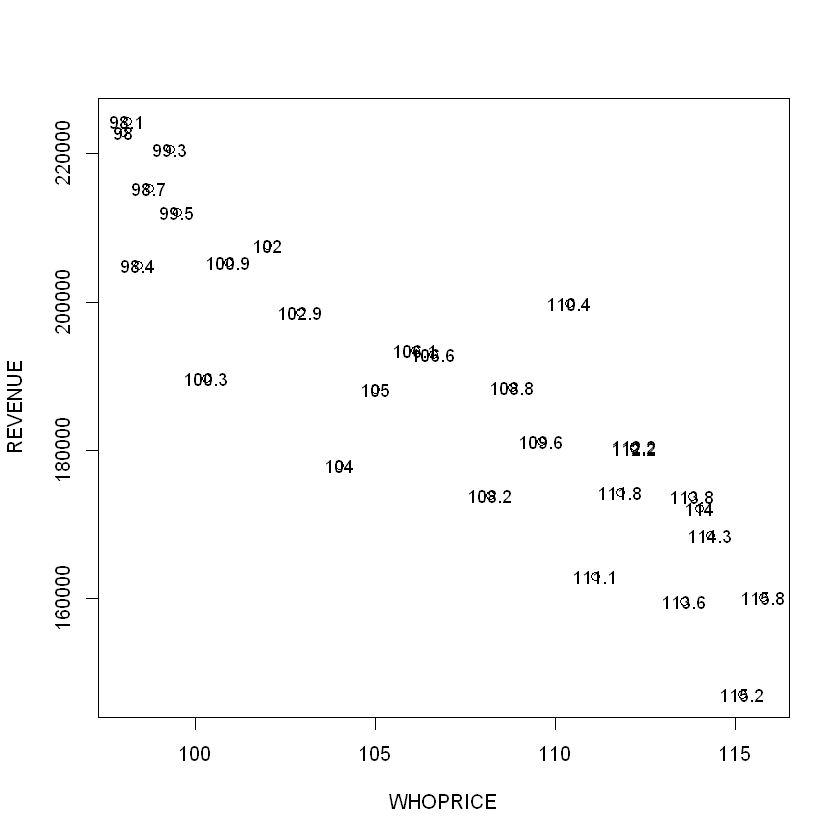

In [20]:
## Plotting Total revenue vs price
plot(REVENUE~WHOPRICE, data= cotton)
text(cotton$WHOPRICE, cotton$REVENUE, labels = cotton$WHOPRICE, cex= 0.9)

We observe that the total revenue and wholesale price are negatively related to each other. Also, we have the highest revenue for wholesale price = 98.1

###### Finding the global maximum total revenue

In order to find the correct relationship between wholesale price and total revenue, we do an experiment and try to find the best possible model fit by increasing the order of the equation.

In [21]:
rev1 = lm(REVENUE~WHOPRICE, data= cotton)
summary(rev1)


Call:
lm(formula = REVENUE ~ WHOPRICE, data = cotton)

Residuals:
   Min     1Q Median     3Q    Max 
-18874  -6447   2023   6090  22108 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 509017.0    32647.3  15.591 1.04e-14 ***
WHOPRICE     -3000.9      305.2  -9.834 3.00e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9694 on 26 degrees of freedom
Multiple R-squared:  0.7881,	Adjusted R-squared:   0.78 
F-statistic:  96.7 on 1 and 26 DF,  p-value: 3.002e-10


We have a model fit score of 78%. Let us increase the order of the equation.

In [22]:
rev2 = lm(REVENUE~poly(WHOPRICE,2, raw=TRUE), data= cotton)
summary(rev2)


Call:
lm(formula = REVENUE ~ poly(WHOPRICE, 2, raw = TRUE), data = cotton)

Residuals:
   Min     1Q Median     3Q    Max 
-18439  -6128   1813   6129  22414 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)
(Intercept)                    673660.83  811755.51   0.830    0.414
poly(WHOPRICE, 2, raw = TRUE)1  -6102.54   15282.48  -0.399    0.693
poly(WHOPRICE, 2, raw = TRUE)2     14.56      71.73   0.203    0.841

Residual standard error: 9878 on 25 degrees of freedom
Multiple R-squared:  0.7885,	Adjusted R-squared:  0.7715 
F-statistic: 46.59 on 2 and 25 DF,  p-value: 3.694e-09


We have a model fit score of 77.15%. Let us increase the order.

In [23]:
rev3 = lm(REVENUE~poly(WHOPRICE,3, raw=TRUE), data= cotton)
summary(rev3)


Call:
lm(formula = REVENUE ~ poly(WHOPRICE, 3, raw = TRUE), data = cotton)

Residuals:
   Min     1Q Median     3Q    Max 
-16736  -4772   3416   5076  18246 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)                     3.851e+07  1.772e+07   2.173   0.0399 *
poly(WHOPRICE, 3, raw = TRUE)1 -1.073e+06  4.994e+05  -2.148   0.0420 *
poly(WHOPRICE, 3, raw = TRUE)2  1.002e+04  4.684e+03   2.140   0.0427 *
poly(WHOPRICE, 3, raw = TRUE)3 -3.125e+01  1.463e+01  -2.137   0.0430 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9241 on 24 degrees of freedom
Multiple R-squared:  0.8223,	Adjusted R-squared:  0.8001 
F-statistic: 37.01 on 3 and 24 DF,  p-value: 3.659e-09


We have a model fit score of 80%. Let us increase the order.

In [24]:
rev4 = lm(REVENUE~poly(WHOPRICE,4, raw=TRUE), data= cotton)
summary(rev4)


Call:
lm(formula = REVENUE ~ poly(WHOPRICE, 4, raw = TRUE), data = cotton)

Residuals:
   Min     1Q Median     3Q    Max 
-16782  -4866   3306   5047  18248 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)
(Intercept)                     1.199e+07  4.204e+08   0.029    0.977
poly(WHOPRICE, 4, raw = TRUE)1 -7.672e+04  1.578e+07  -0.005    0.996
poly(WHOPRICE, 4, raw = TRUE)2 -3.991e+03  2.220e+05  -0.018    0.986
poly(WHOPRICE, 4, raw = TRUE)3  5.628e+01  1.386e+03   0.041    0.968
poly(WHOPRICE, 4, raw = TRUE)4 -2.048e-01  3.243e+00  -0.063    0.950

Residual standard error: 9439 on 23 degrees of freedom
Multiple R-squared:  0.8223,	Adjusted R-squared:  0.7914 
F-statistic: 26.61 on 4 and 23 DF,  p-value: 2.459e-08


We have a model fit score of 79.14%.

Therefore we can conclude that our required model is **rev3**

Let us plot the equation.

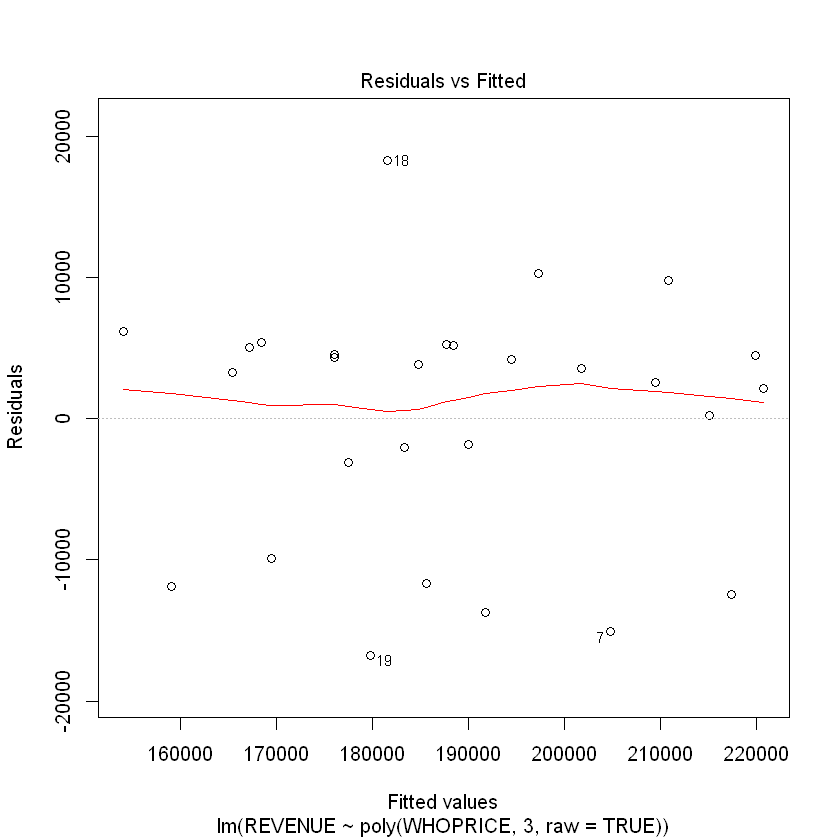

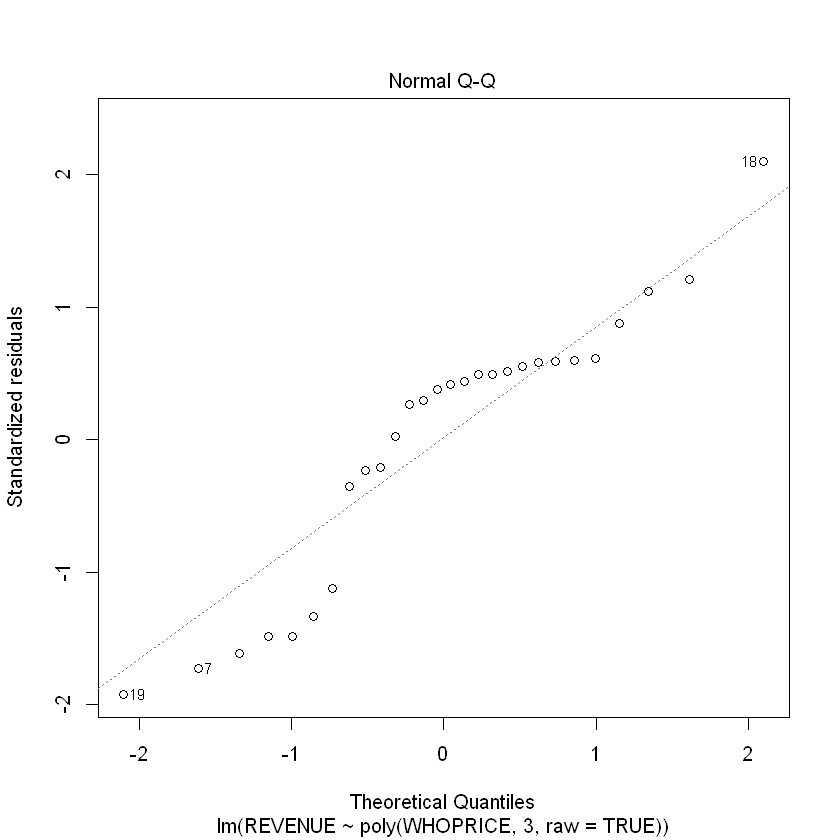

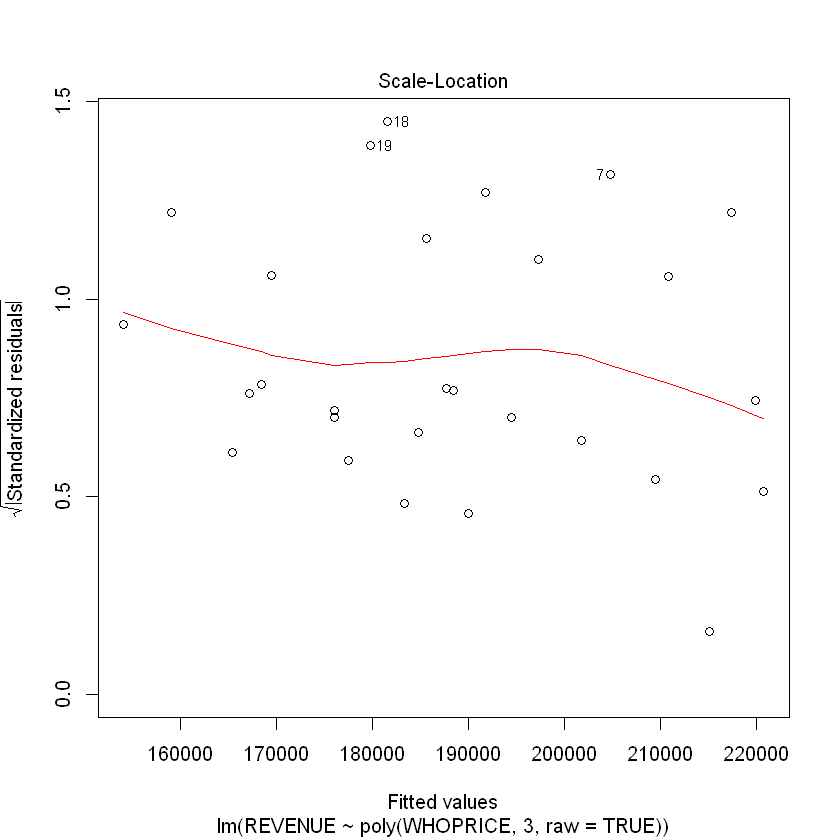

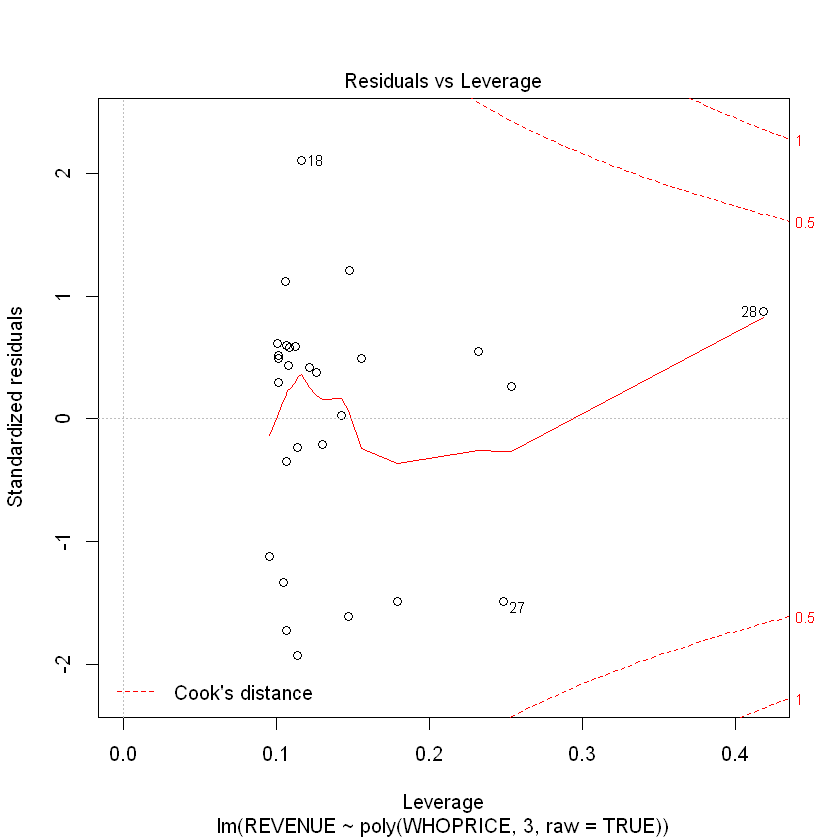

In [25]:
plot(rev3)

##### Modelling

We create a model for quantity as a function of price, imports and exports and forecast the new production quantity.

In [26]:
t <- c(1:28)
prclinfit <- lm(COTTONQ~WHOPRICE + IMPFAB + EXPFAB, data=cotton)
summary(prclinfit)


Call:
lm(formula = COTTONQ ~ WHOPRICE + IMPFAB + EXPFAB, data = cotton)

Residuals:
    Min      1Q  Median      3Q     Max 
-115.48  -64.96  -14.81   60.65  167.95 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6757.0093   322.1569  20.974  < 2e-16 ***
WHOPRICE     -46.9564     2.8354 -16.561 1.23e-14 ***
IMPFAB        -6.5175     2.3056  -2.827  0.00933 ** 
EXPFAB         0.3190     0.1471   2.169  0.04021 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 78.7 on 24 degrees of freedom
Multiple R-squared:  0.9347,	Adjusted R-squared:  0.9266 
F-statistic: 114.6 on 3 and 24 DF,  p-value: 2.331e-14


We have a model fit of 92.66% which is a good fit. Let us check the correlation to see the changes in the variables wrt each other.
1. We observe that cotton quantity is negatively related to quatity of imports. If the quantity of cotton produced increases by 1 unit, the quantity of cotton imports decreases by a factor of 6.5 considering other factors to be constant.
2. We observe that cotton quantity is positively related to quatity of exports. If the quantity of cotton produced increases by 1 unit, the quantity of cotton exports increases by a factor of 0.32 considering other factors to be constant.